In [1]:
import os
import pandas as pd


In [2]:
import os
import pyedflib
import pandas as pd

# Input and output folders
edf_folder = "EEGData"
csv_folder = "Datasets_CSV"
os.makedirs(csv_folder, exist_ok=True)

# Convert .edf to .csv
edf_files = [f for f in os.listdir(edf_folder) if f.endswith(".edf")]

for edf_file in edf_files:
    file_path = os.path.join(edf_folder, edf_file)
    f = pyedflib.EdfReader(file_path)

    labels = f.getSignalLabels()
    signals = {}

    for i, label in enumerate(labels):
        signals[label] = f.readSignal(i)

    df = pd.DataFrame(signals)

    # Add time column
    n_samples = f.getNSamples()[0]
    sample_rate = f.getSampleFrequency(0)
    df.insert(0, "Time", [i / sample_rate for i in range(n_samples)])

    # Save .csv
    output_file = os.path.splitext(edf_file)[0] + ".csv"
    output_path = os.path.join(csv_folder, output_file)
    df.to_csv(output_path, index=False)
    print(f"✅ Saved: {output_path}")

    f._close()


✅ Saved: Datasets_CSV\Subject00_1.csv
✅ Saved: Datasets_CSV\Subject01_1.csv
✅ Saved: Datasets_CSV\Subject02_1.csv
✅ Saved: Datasets_CSV\Subject03_1.csv
✅ Saved: Datasets_CSV\Subject04_1.csv
✅ Saved: Datasets_CSV\Subject05_1.csv
✅ Saved: Datasets_CSV\Subject06_1.csv
✅ Saved: Datasets_CSV\Subject07_1.csv
✅ Saved: Datasets_CSV\Subject08_1.csv
✅ Saved: Datasets_CSV\Subject09_1.csv
✅ Saved: Datasets_CSV\Subject10_1.csv
✅ Saved: Datasets_CSV\Subject11_1.csv
✅ Saved: Datasets_CSV\Subject12_1.csv
✅ Saved: Datasets_CSV\Subject13_1.csv
✅ Saved: Datasets_CSV\Subject14_1.csv
✅ Saved: Datasets_CSV\Subject15_1.csv
✅ Saved: Datasets_CSV\Subject16_1.csv
✅ Saved: Datasets_CSV\Subject17_1.csv
✅ Saved: Datasets_CSV\Subject18_1.csv
✅ Saved: Datasets_CSV\Subject19_1.csv
✅ Saved: Datasets_CSV\Subject20_1.csv
✅ Saved: Datasets_CSV\Subject21_1.csv
✅ Saved: Datasets_CSV\Subject22_1.csv
✅ Saved: Datasets_CSV\Subject23_1.csv
✅ Saved: Datasets_CSV\Subject24_1.csv
✅ Saved: Datasets_CSV\Subject25_1.csv
✅ Saved: Dat

In [ ]:
subject_labels = {
    'Subject00': 0, 'Subject01': 1, 'Subject02': 1, 'Subject03': 1,
    'Subject04': 0, 'Subject05': 1, 'Subject06': 0, 'Subject07': 1,
    'Subject08': 1, 'Subject09': 0, 'Subject10': 0, 'Subject11': 1,
    'Subject12': 1, 'Subject13': 1, 'Subject14': 0, 'Subject15': 1,
    'Subject16': 1, 'Subject17': 1, 'Subject18': 1, 'Subject19': 0,
    'Subject20': 1, 'Subject21': 0, 'Subject22': 0, 'Subject23': 1,
    'Subject24': 1, 'Subject25': 1, 'Subject26': 1, 'Subject27': 1,
    'Subject28': 1, 'Subject29': 1, 'Subject30': 0, 'Subject31': 1,
    'Subject32': 1, 'Subject33': 1, 'Subject34': 1, 'Subject35': 1
}

for file in os.listdir(csv_folder):
    if file.endswith(".csv"):
        subject_id = file.split("_")[0]
        label = subject_labels.get(subject_id)
        if label is not None:
            file_path = os.path.join(csv_folder, file)
            df = pd.read_csv(file_path)
            df['label'] = label
            df.to_csv(file_path, index=False)
            print(f"✅ Updated: {file}")


✅ Updated: Subject00_1.csv
✅ Updated: Subject01_1.csv
✅ Updated: Subject02_1.csv
✅ Updated: Subject03_1.csv
✅ Updated: Subject04_1.csv
✅ Updated: Subject05_1.csv
✅ Updated: Subject06_1.csv
✅ Updated: Subject07_1.csv
✅ Updated: Subject08_1.csv
✅ Updated: Subject09_1.csv
✅ Updated: Subject10_1.csv
✅ Updated: Subject11_1.csv
✅ Updated: Subject12_1.csv
✅ Updated: Subject13_1.csv
✅ Updated: Subject14_1.csv
✅ Updated: Subject15_1.csv
✅ Updated: Subject16_1.csv
✅ Updated: Subject17_1.csv
✅ Updated: Subject18_1.csv


In [4]:
import os
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

# Paths based on your Jupyter folders
input_folder = "Datasets_CSV"
output_folder = "ExtractedFeatures"
chunk_size = 1000

# EEG + ECG columns (excluding 'Time')
eeg_channels = ['EEG Fp1', 'EEG Fp2', 'EEG F3', 'EEG F4', 'EEG F7', 'EEG F8',
                'EEG T3', 'EEG T4', 'EEG C3', 'EEG C4', 'EEG T5', 'EEG T6',
                'EEG P3', 'EEG P4', 'EEG O1', 'EEG O2', 'EEG Fz', 'EEG Cz',
                'EEG Pz']
ecg_channel = 'ECG ECG'

# Create output directory if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Function to extract features from a chunk
def extract_features_from_chunk(chunk):
    features = []
    for col in eeg_channels + [ecg_channel]:
        signal = chunk[col].values
        features.extend([
            np.mean(signal),
            np.std(signal),
            np.min(signal),
            np.max(signal),
            skew(signal),
            kurtosis(signal)
        ])
    return features

# Loop through each .csv file in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith(".csv"):
        df = pd.read_csv(os.path.join(input_folder, filename))

        # Drop 'Time' column if present
        if 'Time' in df.columns:
            df = df.drop(columns=['Time'])

        label = df['label'].iloc[0]
        df = df.drop(columns=['label'])

        features_list = []
        for i in range(0, len(df), chunk_size):
            chunk = df.iloc[i:i+chunk_size]
            if len(chunk) == chunk_size:
                features = extract_features_from_chunk(chunk)
                features.append(label)
                features_list.append(features)

        feature_df = pd.DataFrame(features_list)
        feature_df.to_csv(os.path.join(output_folder, f"features_{filename}"), index=False)

print("✅ Feature extraction completed.")


✅ Feature extraction completed.


In [5]:
import os
import pandas as pd

# Jupyter-based paths
input_folder = "ExtractedFeatures"
output_file = "features_master_dataset.csv"

# Read and combine all CSVs
all_dfs = []
for filename in os.listdir(input_folder):
    if filename.endswith(".csv"):
        file_path = os.path.join(input_folder, filename)
        df = pd.read_csv(file_path)
        all_dfs.append(df)

# Combine all into a single DataFrame
combined_df = pd.concat(all_dfs, ignore_index=True)
combined_df.to_csv(output_file, index=False)

print("✅ All feature files combined into one master dataset.")


✅ All feature files combined into one master dataset.


In [6]:
import pandas as pd

file_path = "features_master_dataset.csv"
df = pd.read_csv(file_path)

# Shuffle and save
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)
df_shuffled.to_csv(file_path, index=False)

print("✅ Dataset shuffled and saved successfully!")


✅ Dataset shuffled and saved successfully!


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
import os

file_path = "features_master_dataset.csv"
output_dir = "Dataset"

df = pd.read_csv(file_path)

# Split into 70% train and 30% temp
train_df, temp_df = train_test_split(
    df, test_size=0.3, stratify=df["120"], random_state=42
)

# Split temp into 10% val and 20% test
val_df, test_df = train_test_split(
    temp_df, test_size=2/3, stratify=temp_df["120"], random_state=42
)

# Save datasets
os.makedirs(output_dir, exist_ok=True)
train_df.to_csv(os.path.join(output_dir, "train.csv"), index=False)
val_df.to_csv(os.path.join(output_dir, "val.csv"), index=False)
test_df.to_csv(os.path.join(output_dir, "test.csv"), index=False)

print("✅ Dataset successfully split and saved to:")
print(f" - Train: {len(train_df)} instances")
print(f" - Validation: {len(val_df)} instances")
print(f" - Test: {len(test_df)} instances")


✅ Dataset successfully split and saved to:
 - Train: 2255 instances
 - Validation: 322 instances
 - Test: 645 instances


In [8]:

import pandas as pd

df = pd.read_csv("features_master_dataset.csv")
label_col = "120"

class_counts = df[label_col].value_counts().sort_index()
print("📊 Class Distribution:")
print(class_counts)

print("\n🔢 Class Percentages:")
print((class_counts / len(df) * 100).round(2))


📊 Class Distribution:
0     907
1    2315
Name: 120, dtype: int64

🔢 Class Percentages:
0    28.15
1    71.85
Name: 120, dtype: float64


In [9]:
import pandas as pd

df = pd.read_csv("Dataset/train.csv")
label_col = "120"

class_counts = df[label_col].value_counts().sort_index()
print("📊 Class Distribution:")
print(class_counts)

print("\n🔢 Class Percentages:")
print((class_counts / len(df) * 100).round(2))


📊 Class Distribution:
0     635
1    1620
Name: 120, dtype: int64

🔢 Class Percentages:
0    28.16
1    71.84
Name: 120, dtype: float64


In [10]:

from imblearn.combine import SMOTETomek
import pandas as pd

train_df = pd.read_csv("Dataset/train.csv")
X_train = train_df.drop(columns=["120"])
y_train = train_df["120"]

smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)

resampled_train_df = pd.concat([pd.DataFrame(X_resampled, columns=X_train.columns), 
                                pd.Series(y_resampled, name="120")], axis=1)
resampled_train_df.to_csv("Dataset/train.csv", index=False)

print("✅ Applied SMOTE Tomek and saved the balanced training set!")


✅ Applied SMOTE Tomek and saved the balanced training set!


In [11]:

import pandas as pd

df = pd.read_csv("Dataset/train.csv")
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)
df_shuffled.to_csv("Dataset/train.csv", index=False)

print("✅ Balanced dataset shuffled and saved!")


✅ Balanced dataset shuffled and saved!


In [12]:
import pandas as pd

df = pd.read_csv("Dataset/train.csv")
features_only = df.drop(columns=["120"])

skewness = features_only.skew()

print("📈 Skewness of features:")
print(skewness.sort_values(ascending=False))

highly_skewed = skewness[abs(skewness) > 1]
print("\n⚠️ Highly skewed features (|skew| > 1):")
print(highly_skewed)


📈 Skewness of features:
29     50.181218
113    45.092504
65     41.612730
95     41.563544
5      38.750833
         ...    
106    -7.040539
82     -7.985875
60    -17.348037
112   -19.072981
62    -20.021090
Length: 120, dtype: float64

⚠️ Highly skewed features (|skew| > 1):
1       1.962262
2      -1.979185
3       1.410036
4      10.214273
5      38.750833
         ...    
115    16.211193
116    -2.615894
117     2.662639
118    -1.072479
119    24.818560
Length: 108, dtype: float64


In [13]:

import pandas as pd
from sklearn.preprocessing import RobustScaler

train_df = pd.read_csv("Dataset/train.csv")
val_df = pd.read_csv("Dataset/val.csv")
test_df = pd.read_csv("Dataset/test.csv")

X_train = train_df.drop(columns=["120"])
y_train = train_df["120"]
X_val = val_df.drop(columns=["120"])
y_val = val_df["120"]
X_test = test_df.drop(columns=["120"])
y_test = test_df["120"]

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

train_scaled_df = pd.concat([pd.DataFrame(X_train_scaled, columns=X_train.columns), y_train.reset_index(drop=True)], axis=1)
val_scaled_df = pd.concat([pd.DataFrame(X_val_scaled, columns=X_val.columns), y_val.reset_index(drop=True)], axis=1)
test_scaled_df = pd.concat([pd.DataFrame(X_test_scaled, columns=X_test.columns), y_test.reset_index(drop=True)], axis=1)

train_scaled_df.to_csv("Dataset/train_balanced_scaled.csv", index=False)
val_scaled_df.to_csv("Dataset/val_scaled.csv", index=False)
test_scaled_df.to_csv("Dataset/test_scaled.csv", index=False)

print("✅ All datasets normalized and saved!")


✅ All datasets normalized and saved!


In [17]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Use relative paths as per Jupyter file structure
train_path = "Dataset/train_balanced_scaled.csv"
val_path = "Dataset/val_scaled.csv"
test_path = "Dataset/test_scaled.csv"

# Load datasets
train_df = pd.read_csv(train_path)
val_df = pd.read_csv(val_path)
test_df = pd.read_csv(test_path)

# Split into features and labels
X_train, y_train = train_df.drop(columns=['120']), train_df['120']
X_val, y_val = val_df.drop(columns=['120']), val_df['120']
X_test, y_test = test_df.drop(columns=['120']), test_df['120']

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate on train, val, test
print("✅ Random Forest - Training Accuracy:", accuracy_score(y_train, rf.predict(X_train)))
print("✅ AUC-ROC (Train):", roc_auc_score(y_train, rf.predict_proba(X_train)[:, 1]))

print("\n📊 Validation Results:")
val_preds = rf.predict(X_val)
print("Accuracy:", accuracy_score(y_val, val_preds))
print("AUC-ROC:", roc_auc_score(y_val, rf.predict_proba(X_val)[:, 1]))
print("Confusion Matrix:\n", confusion_matrix(y_val, val_preds))
print("Classification Report:\n", classification_report(y_val, val_preds))

print("\n🧪 Test Results:")
test_preds = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, test_preds))
print("AUC-ROC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))
print("Confusion Matrix:\n", confusion_matrix(y_test, test_preds))
print("Classification Report:\n", classification_report(y_test, test_preds))


✅ Random Forest - Training Accuracy: 1.0
✅ AUC-ROC (Train): 1.0

📊 Validation Results:
Accuracy: 0.922360248447205
AUC-ROC: 0.977760334903192
Confusion Matrix:
 [[ 78  13]
 [ 12 219]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.86        91
           1       0.94      0.95      0.95       231

    accuracy                           0.92       322
   macro avg       0.91      0.90      0.90       322
weighted avg       0.92      0.92      0.92       322


🧪 Test Results:
Accuracy: 0.924031007751938
AUC-ROC: 0.9730901124023624
Confusion Matrix:
 [[158  23]
 [ 26 438]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.87       181
           1       0.95      0.94      0.95       464

    accuracy                           0.92       645
   macro avg       0.90      0.91      0.91       645
weighted avg       0.92      0.92      0.92       645


In [19]:
!pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/29/22/e3ff2dfafe862a91733dfa0aecdb4794aa1d9a18e09a14e118bde0cbc2db/xgboost-3.0.2-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/150.0 MB 1.1 MB/s eta 0:02:23
   ---------------------------------------- 0.3/150.0 MB 2.0 MB/s eta 0:01:14
   ---------------------------------------- 0.5/150.0 MB 2.8 MB/s eta 0:00:55
   ---------------------------------------- 0.7/150.0 MB 3.3 MB/s eta 0:00:45
   ---------------------------------------- 1.0/150.0 MB 3.6 MB/s eta 0:00:42
   ---------------------------------------- 1.1/150.0 MB 3.7 MB/s eta 0:00:40
   ---------------------------------------- 1.1/150.0 MB 3.2 MB/s eta 0:00:48
   ---------------------------------------- 1.4/150.0 MB 3.4 MB/s eta 0:00:44
   --------------------------

In [20]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Load datasets (already done previously, but repeated for standalone use)
train_df = pd.read_csv("Dataset/train_balanced_scaled.csv")
val_df = pd.read_csv("Dataset/val_scaled.csv")
test_df = pd.read_csv("Dataset/test_scaled.csv")

# Split into features and labels
X_train, y_train = train_df.drop(columns=['120']), train_df['120']
X_val, y_val = val_df.drop(columns=['120']), val_df['120']
X_test, y_test = test_df.drop(columns=['120']), test_df['120']

# Train XGBoost model
xgb_clf = xgb.XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train, y_train)

# Training evaluation
print("✅ XGBoost - Training Accuracy:", accuracy_score(y_train, xgb_clf.predict(X_train)))
print("✅ AUC-ROC (Train):", roc_auc_score(y_train, xgb_clf.predict_proba(X_train)[:, 1]))

# Validation evaluation
val_preds = xgb_clf.predict(X_val)
print("\n📊 XGBoost - Validation Accuracy:", accuracy_score(y_val, val_preds))
print("AUC-ROC:", roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:, 1]))
print("Confusion Matrix:\n", confusion_matrix(y_val, val_preds))
print("Classification Report:\n", classification_report(y_val, val_preds))

# Test evaluation
test_preds = xgb_clf.predict(X_test)
print("\n🧪 XGBoost - Test Accuracy:", accuracy_score(y_test, test_preds))
print("AUC-ROC:", roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1]))
print("Confusion Matrix:\n", confusion_matrix(y_test, test_preds))
print("Classification Report:\n", classification_report(y_test, test_preds))


C:\Users\yadla\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ XGBoost - Training Accuracy: 1.0
✅ AUC-ROC (Train): 0.9999999999999999

📊 XGBoost - Validation Accuracy: 0.9658385093167702
AUC-ROC: 0.9974311402882832
Confusion Matrix:
 [[ 84   7]
 [  4 227]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.94        91
           1       0.97      0.98      0.98       231

    accuracy                           0.97       322
   macro avg       0.96      0.95      0.96       322
weighted avg       0.97      0.97      0.97       322


🧪 XGBoost - Test Accuracy: 0.9643410852713178
AUC-ROC: 0.9926533625452467
Confusion Matrix:
 [[169  12]
 [ 11 453]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94       181
           1       0.97      0.98      0.98       464

    accuracy                           0.96       645
   macro avg       0.96      0.95      0.96       645
weighted avg       0.96      0.96      0

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

# Load datasets again if needed
train_df = pd.read_csv("Dataset/train_balanced_scaled.csv")
val_df = pd.read_csv("Dataset/val_scaled.csv")
test_df = pd.read_csv("Dataset/test_scaled.csv")

# Feature/Label split
X_train, y_train = train_df.drop(columns=['120']), train_df['120']
X_val, y_val = val_df.drop(columns=['120']), val_df['120']
X_test, y_test = test_df.drop(columns=['120']), test_df['120']

# Train Gradient Boosting model
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)

# Training evaluation
print("✅ Gradient Boosting - Training Accuracy:", accuracy_score(y_train, gb_clf.predict(X_train)))
print("✅ AUC-ROC (Train):", roc_auc_score(y_train, gb_clf.predict_proba(X_train)[:, 1]))

# Validation evaluation
val_preds = gb_clf.predict(X_val)
print("\n📊 Gradient Boosting - Validation Accuracy:", accuracy_score(y_val, val_preds))
print("AUC-ROC:", roc_auc_score(y_val, gb_clf.predict_proba(X_val)[:, 1]))
print("Confusion Matrix:\n", confusion_matrix(y_val, val_preds))
print("Classification Report:\n", classification_report(y_val, val_preds))

# Test evaluation
test_preds = gb_clf.predict(X_test)
print("\n🧪 Gradient Boosting - Test Accuracy:", accuracy_score(y_test, test_preds))
print("AUC-ROC:", roc_auc_score(y_test, gb_clf.predict_proba(X_test)[:, 1]))
print("Confusion Matrix:\n", confusion_matrix(y_test, test_preds))
print("Classification Report:\n", classification_report(y_test, test_preds))


✅ Gradient Boosting - Training Accuracy: 0.9879480840543882
✅ AUC-ROC (Train): 0.9991756827165341

📊 Gradient Boosting - Validation Accuracy: 0.9596273291925466
AUC-ROC: 0.9919604205318492
Confusion Matrix:
 [[ 88   3]
 [ 10 221]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93        91
           1       0.99      0.96      0.97       231

    accuracy                           0.96       322
   macro avg       0.94      0.96      0.95       322
weighted avg       0.96      0.96      0.96       322


🧪 Gradient Boosting - Test Accuracy: 0.9193798449612403
AUC-ROC: 0.9738640693465422
Confusion Matrix:
 [[162  19]
 [ 33 431]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86       181
           1       0.96      0.93      0.94       464

    accuracy                           0.92       645
   macro avg       0.89      0.91      0.90      

In [23]:
!pip install geneticalgorithm


  Obtaining dependency information for geneticalgorithm from https://files.pythonhosted.org/packages/ac/d2/fb9061239eaeee5c0373844f27f43514f33201bc08aea54d65b437402966/geneticalgorithm-1.0.2-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/44.3 kB ? eta -:--:--
     ---------------------------------------- 44.3/44.3 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15110 sha256=9c26ec76e171cf1fd4a15ec32603101c83b6fe706a2275c557106b7936246609
  Stored in directory: c:\users\yadla\appdata\local\pip\cache\wheels\07\e6\86\f23164d12c3134966614102db8e7956ab359faf7ffd78703ce
Successfully built func-timeout


 The best solution found:                                                                           
 [0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1.
 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1.]

 Objective function:
 0.20496894409937894


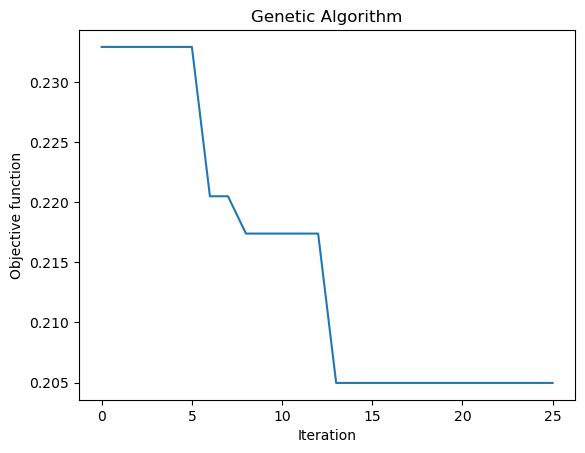


Selected features: 50
Files saved: train_selected.csv, val_selected.csv, test_selected.csv, selected_features_names.csv


In [24]:
#Genetic Algorithm for Feature Selection

import numpy as np
import pandas as pd
from geneticalgorithm import geneticalgorithm as ga
from sklearn.linear_model import LogisticRegression

# Load datasets (with header)
train_df = pd.read_csv("Dataset/train_balanced_scaled.csv")
val_df = pd.read_csv("Dataset/val_scaled.csv")
test_df = pd.read_csv("Dataset/test_scaled.csv")

# Split into features and labels
X_train = train_df.iloc[:, :-1].values
y_train = train_df.iloc[:, -1].values

X_val = val_df.iloc[:, :-1].values
y_val = val_df.iloc[:, -1].values

X_test = test_df.iloc[:, :-1].values
y_test = test_df.iloc[:, -1].values

# Save column names for selected features
feature_names = train_df.columns[:-1].tolist()

num_features = X_train.shape[1]

# Fitness Function
def fitness_function(bit_vector):
    if np.count_nonzero(bit_vector) == 0:
        return 1  # penalize empty sets

    selected = np.where(bit_vector == 1)[0]
    X_train_sel = X_train[:, selected]
    X_val_sel = X_val[:, selected]

    try:
        clf = LogisticRegression(max_iter=1000)
        clf.fit(X_train_sel, y_train)
        acc = clf.score(X_val_sel, y_val)
        return 1 - acc
    except:
        return 1

# GA setup
algorithm_params = {
    'max_num_iteration': 50,
    'population_size': 40,
    'mutation_probability': 0.1,
    'elit_ratio': 0.01,
    'crossover_probability': 0.5,
    'parents_portion': 0.3,
    'crossover_type': 'uniform',
    'max_iteration_without_improv': 10,
    'funtimeout': 60
}

varbound = np.array([[0, 1]] * num_features)
vartype = 'int'

model = ga(
    function=fitness_function,
    dimension=num_features,
    variable_type=vartype,
    variable_boundaries=varbound,
    algorithm_parameters=algorithm_params
)

model.run()

# Get best selection
best_bits = model.output_dict['variable']
selected_indices = np.where(best_bits == 1)[0]
selected_names = [feature_names[i] for i in selected_indices]

# Apply to datasets
X_train_sel = X_train[:, selected_indices]
X_val_sel = X_val[:, selected_indices]
X_test_sel = X_test[:, selected_indices]

# Add labels back
train_selected_df = pd.DataFrame(X_train_sel, columns=selected_names)
train_selected_df["Label"] = y_train

val_selected_df = pd.DataFrame(X_val_sel, columns=selected_names)
val_selected_df["Label"] = y_val

test_selected_df = pd.DataFrame(X_test_sel, columns=selected_names)
test_selected_df["Label"] = y_test

# Save outputs
train_selected_df.to_csv("train_selected.csv", index=False)
val_selected_df.to_csv("val_selected.csv", index=False)
test_selected_df.to_csv("test_selected.csv", index=False)

# Optional: Save selected feature names
pd.Series(selected_names).to_csv("selected_features_names.csv", index=False, header=False)

print(f"✅ Feature selection complete.\nSelected features: {len(selected_indices)}")
print("Files saved: train_selected.csv, val_selected.csv, test_selected.csv, selected_features_names.csv")

In [25]:
#Random Forest

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score, roc_auc_score
)

# Paths
train_path = "train_selected.csv"
val_path = "val_selected.csv"
test_path = "test_selected.csv"

# Load datasets
train_df = pd.read_csv(train_path)
val_df = pd.read_csv(val_path)
test_df = pd.read_csv(test_path)

# Separate features and labels
X_train, y_train = train_df.drop(columns=['Label']), train_df['Label']
X_val, y_val = val_df.drop(columns=['Label']), val_df['Label']
X_test, y_test = test_df.drop(columns=['Label']), test_df['Label']

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate on training set
train_preds = rf_model.predict(X_train)
train_probs = rf_model.predict_proba(X_train)[:, 1]
print("✅ Training Set Evaluation:")
print("Accuracy:", accuracy_score(y_train, train_preds))
print("AUC-ROC:", roc_auc_score(y_train, train_probs))

# Evaluate on validation set
val_preds = rf_model.predict(X_val)
val_probs = rf_model.predict_proba(X_val)[:, 1]
print("\n📊 Validation Set Evaluation:")
print("Accuracy:", accuracy_score(y_val, val_preds))
print("AUC-ROC:", roc_auc_score(y_val, val_probs))
print("Confusion Matrix:\n", confusion_matrix(y_val, val_preds))
print("Classification Report:\n", classification_report(y_val, val_preds))

# Evaluate on test set
test_preds = rf_model.predict(X_test)
test_probs = rf_model.predict_proba(X_test)[:, 1]
print("\n🧪 Test Set Evaluation:")
print("Accuracy:", accuracy_score(y_test, test_preds))
print("AUC-ROC:", roc_auc_score(y_test, test_probs))
print("Confusion Matrix:\n", confusion_matrix(y_test, test_preds))
print("Classification Report:\n", classification_report(y_test, test_preds))

✅ Training Set Evaluation:
Accuracy: 1.0
AUC-ROC: 1.0

📊 Validation Set Evaluation:
Accuracy: 0.9099378881987578
AUC-ROC: 0.9485990200275914
Confusion Matrix:
 [[ 73  18]
 [ 11 220]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.80      0.83        91
           1       0.92      0.95      0.94       231

    accuracy                           0.91       322
   macro avg       0.90      0.88      0.89       322
weighted avg       0.91      0.91      0.91       322


🧪 Test Set Evaluation:
Accuracy: 0.8682170542635659
AUC-ROC: 0.9313321585063822
Confusion Matrix:
 [[137  44]
 [ 41 423]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.76      0.76       181
           1       0.91      0.91      0.91       464

    accuracy                           0.87       645
   macro avg       0.84      0.83      0.84       645
weighted avg       0.87      0.87      0.87    

In [26]:
#XGBoost

import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_auc_score
)

# Paths
train_path = "train_selected.csv"
val_path = "val_selected.csv"
test_path = "test_selected.csv"

# Load data
train_df = pd.read_csv(train_path)
val_df = pd.read_csv(val_path)
test_df = pd.read_csv(test_path)

# Separate features and target
X_train, y_train = train_df.drop(columns=['Label']), train_df['Label']
X_val, y_val = val_df.drop(columns=['Label']), val_df['Label']
X_test, y_test = test_df.drop(columns=['Label']), test_df['Label']

# Calculate class weight for imbalance
from collections import Counter
count = Counter(y_train)
scale_pos_weight = count[0] / count[1]  # For binary classification: 0 = majority, 1 = minority

# Initialize XGBoost Classifier
xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42,
    verbosity=0
)

# Train
xgb_model.fit(X_train, y_train)

# Evaluate on training set
train_preds = xgb_model.predict(X_train)
train_probs = xgb_model.predict_proba(X_train)[:, 1]
print("✅ Training Set Evaluation:")
print("Accuracy:", accuracy_score(y_train, train_preds))
print("AUC-ROC:", roc_auc_score(y_train, train_probs))

# Evaluate on validation set
val_preds = xgb_model.predict(X_val)
val_probs = xgb_model.predict_proba(X_val)[:, 1]
print("\n📊 Validation Set Evaluation:")
print("Accuracy:", accuracy_score(y_val, val_preds))
print("AUC-ROC:", roc_auc_score(y_val, val_probs))
print("Confusion Matrix:\n", confusion_matrix(y_val, val_preds))
print("Classification Report:\n", classification_report(y_val, val_preds))

# Evaluate on test set
test_preds = xgb_model.predict(X_test)
test_probs = xgb_model.predict_proba(X_test)[:, 1]
print("\n🧪 Test Set Evaluation:")
print("Accuracy:", accuracy_score(y_test, test_preds))
print("AUC-ROC:", roc_auc_score(y_test, test_probs))
print("Confusion Matrix:\n", confusion_matrix(y_test, test_preds))
print("Classification Report:\n", classification_report(y_test, test_preds))

✅ Training Set Evaluation:
Accuracy: 1.0
AUC-ROC: 1.0

📊 Validation Set Evaluation:
Accuracy: 0.9161490683229814
AUC-ROC: 0.9656533942248228
Confusion Matrix:
 [[ 74  17]
 [ 10 221]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.81      0.85        91
           1       0.93      0.96      0.94       231

    accuracy                           0.92       322
   macro avg       0.90      0.88      0.89       322
weighted avg       0.92      0.92      0.92       322


🧪 Test Set Evaluation:
Accuracy: 0.8806201550387597
AUC-ROC: 0.9482758620689654
Confusion Matrix:
 [[143  38]
 [ 39 425]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79       181
           1       0.92      0.92      0.92       464

    accuracy                           0.88       645
   macro avg       0.85      0.85      0.85       645
weighted avg       0.88      0.88      0.88    

In [27]:
#Gradient Boosting

import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score, roc_auc_score
)

# Paths
train_path = "train_selected.csv"
val_path = "val_selected.csv"
test_path = "test_selected.csv"

# Load datasets
train_df = pd.read_csv(train_path)
val_df = pd.read_csv(val_path)
test_df = pd.read_csv(test_path)

# Separate features and labels
X_train, y_train = train_df.drop(columns=['Label']), train_df['Label']
X_val, y_val = val_df.drop(columns=['Label']), val_df['Label']
X_test, y_test = test_df.drop(columns=['Label']), test_df['Label']

# Initialize and train Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,            # helps with overfitting
    random_state=42
)
gb_model.fit(X_train, y_train)

# Evaluate on training set
train_preds = gb_model.predict(X_train)
train_probs = gb_model.predict_proba(X_train)[:, 1]
print("✅ Training Set Evaluation:")
print("Accuracy:", accuracy_score(y_train, train_preds))
print("AUC-ROC:", roc_auc_score(y_train, train_probs))

# Evaluate on validation set
val_preds = gb_model.predict(X_val)
val_probs = gb_model.predict_proba(X_val)[:, 1]
print("\n📊 Validation Set Evaluation:")
print("Accuracy:", accuracy_score(y_val, val_preds))
print("AUC-ROC:", roc_auc_score(y_val, val_probs))
print("Confusion Matrix:\n", confusion_matrix(y_val, val_preds))
print("Classification Report:\n", classification_report(y_val, val_preds))

# Evaluate on test set
test_preds = gb_model.predict(X_test)
test_probs = gb_model.predict_proba(X_test)[:, 1]
print("\n🧪 Test Set Evaluation:")
print("Accuracy:", accuracy_score(y_test, test_preds))
print("AUC-ROC:", roc_auc_score(y_test, test_probs))
print("Confusion Matrix:\n", confusion_matrix(y_test, test_preds))
print("Classification Report:\n", classification_report(y_test, test_preds))

✅ Training Set Evaluation:
Accuracy: 0.988257107540173
AUC-ROC: 0.9993995242031473

📊 Validation Set Evaluation:
Accuracy: 0.8944099378881988
AUC-ROC: 0.9482898054326626
Confusion Matrix:
 [[ 76  15]
 [ 19 212]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82        91
           1       0.93      0.92      0.93       231

    accuracy                           0.89       322
   macro avg       0.87      0.88      0.87       322
weighted avg       0.90      0.89      0.90       322


🧪 Test Set Evaluation:
Accuracy: 0.8465116279069768
AUC-ROC: 0.9277362354734235
Confusion Matrix:
 [[140  41]
 [ 58 406]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.77      0.74       181
           1       0.91      0.88      0.89       464

    accuracy                           0.85       645
   macro avg       0.81      0.82      0.82       645
weighted avg      